# 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!


## (1) 데이터 가져오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

%matplotlib inline

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target

In [2]:
df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [3]:
df_X = diabetes.data
df_y = diabetes.target

## (2) 모델에 입력할 데이터 X 준비하기 
## (3) 모델에 예측할 데이터 y 준비하기

In [4]:
df_X = np.array(df_X)
df_y = np.array(df_y)

## (4) train 데이터와 test 데이터로 분리하기

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size = 0.2, random_state = 42
)

In [6]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## (5) 모델 준비하기

In [7]:
W = np.random.rand(10)
b = np.random.rand()

print(W, b)

[0.25863355 0.00638536 0.13982225 0.35530891 0.00409997 0.07311178
 0.78170206 0.96898988 0.58102106 0.39705534] 0.1418281080237529


In [8]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

## (6) 손실함수 loss 정의하기

In [9]:
def MSE(a, b):
    mse = ((a-b)**2).mean()
    return mse

In [10]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

## (7) 기울기를 구하는 gradient 함수 구현하기

In [11]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred-y)
    
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [12]:
dW, db = gradient(X_train, W, b, y_train)
print("dW : ", dW)
print("db : ", db)

dW :  [ -65.54450384   -3.80963392 -175.79023871 -131.09853933  -46.17489387
  -31.65029657  109.93753157 -115.5393371  -158.10202649 -124.10474563]
db :  -307.18538416095777


## (8) 하이퍼 파라미터인 학습률 설정하기

In [13]:
LEARNING_RATE = 0.01

## (9) 모델 학습하기

In [14]:
losses = []

for i in range(1, 20001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i%1000 == 0:
        print(i, "th loss : %0.4f" %(L))

1000 th loss : 2949.2648
2000 th loss : 2901.8969
3000 th loss : 2897.6736
4000 th loss : 2896.4409
5000 th loss : 2895.5695
6000 th loss : 2894.7708
7000 th loss : 2894.0034
8000 th loss : 2893.2602
9000 th loss : 2892.5392
10000 th loss : 2891.8396
11000 th loss : 2891.1607
12000 th loss : 2890.5018
13000 th loss : 2889.8622
14000 th loss : 2889.2413
15000 th loss : 2888.6386
16000 th loss : 2888.0536
17000 th loss : 2887.4856
18000 th loss : 2886.9343
19000 th loss : 2886.3990
20000 th loss : 2885.8793


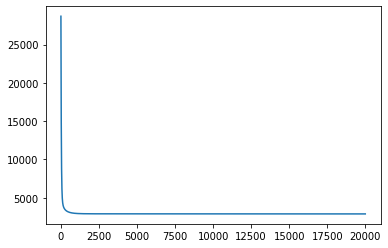

In [15]:
plt.plot(losses)
plt.show()

## (10) test 데이터에 대한 성능 확인하기

In [16]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2886.2285268133455

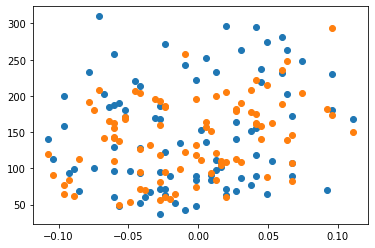

In [17]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

## (11) 정답 데이터와 예측한 데이터 시각화하기

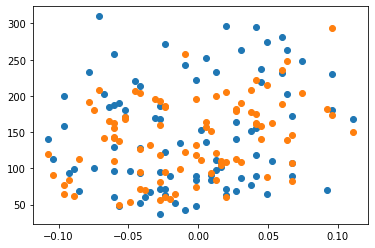

In [18]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()